# Perceptron

In [1]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
class Network():
    def __init__(self, threshold, lr, iter):
        self._threshold = threshold
        self._lr = lr
        self._iter = iter
    
    def fit(self, X, y):
        self._w = np.zeros(1+X.shape[1])
        self.loss = []

        for _ in range(self._iter):
            error = 0
            for xi, target in zip(X, y):
                update = self._lr * (target - self.predict(xi))
                self._w[1:] += update * xi 
                self._w[0] += update 
                error += int(update != 0.0)
            self.loss.append(error)
            print(self._w)
        return self

    def feed(self, X):
        return np.dot(X, self._w[1:]) + self._w[0] # np.dot => matrics multifly

    def predict(self, X):
        return np.where(self.feed(X) > self._threshold, 1, -1)

Iris 데이터셋 불러오기

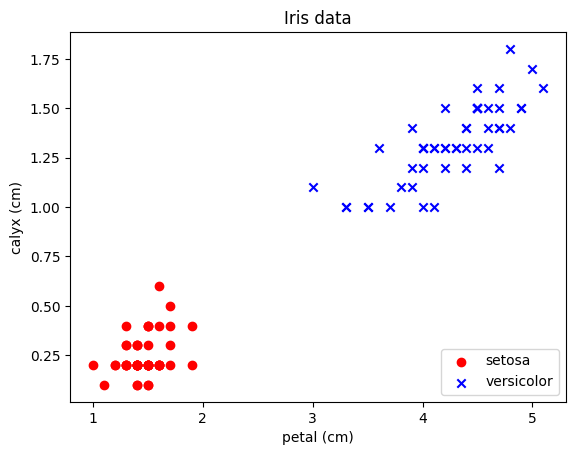

In [3]:
iris = load_iris()
X = iris.data[:100,[2,3]]
y = iris.target[:100]
y = np.where(y==0, -1, 1)

# Draw plt
plt.scatter(X[:50, 0], X[:50, 1], color='r', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='b', marker='x', label='versicolor')
plt.title('Iris data')
plt.xlabel('petal (cm)')
plt.ylabel('calyx (cm)')
plt.legend(loc=4)
plt.show()

In [4]:
threshold = 0.0
lr = 0.01
iter = 10

p = Network(threshold, lr, iter)
p.fit(X, y)
print(p.loss)

[0.02  0.094 0.028]
[-0.04   0.012  0.016]
[-0.04   0.012  0.016]
[-0.04   0.012  0.016]
[-0.04   0.012  0.016]
[-0.04   0.012  0.016]
[-0.04   0.012  0.016]
[-0.04   0.012  0.016]
[-0.04   0.012  0.016]
[-0.04   0.012  0.016]
[1, 3, 0, 0, 0, 0, 0, 0, 0, 0]


In [5]:
test_X = iris.data[100:105, [2, 3]]
test_y = iris.target[100:105]

w1 = -0.04
w2 = 0.012  
w3 = 0.016

for x, target in zip(test_X, test_y):
    predit = w1 + w2*x[0] + w3*x[1]
    print("Iris-setosa" if predit <= 0 else "Iris-versicolor")


Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor


sklearn 패키지로 perceptron 불러와 학습

In [6]:
from pyexpat.errors import XML_ERROR_PARTIAL_CHAR
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X = iris.data[:, [2, 3]]
y = iris.target[:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
sc.fit(X_train) # X_train의 평균과 표준편차를 구함

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

ml = Perceptron(eta0=0.01, max_iter=20, random_state=0)
ml.fit(X_train_std, y_train)

y_pred = ml.predict(X_test_std)

print(f'Total : %d' %(len(y_test)))
print(f'Acurracy : %.2f' %accuracy_score(y_test, y_pred))

Total : 30
Acurracy : 0.90
